In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Constants
k = 1 # constante elástica en [N/m]
m = 1 # masa en [kg]
x0 = 1.0
v0 = 0.0
ENERGY = [0.5, 1, 2]

In [3]:
# Construccion del espacio de fases
x = np.linspace(-2,2,100)
p = np.linspace(-2,2,100)
# Construccion del espacio R^2
X, P = np.meshgrid(x,p)

In [4]:
dxdt = P / m
dpdt = (-k/m) * X

### Energia

La energia del sistema viene dada por T + V

E = $\frac{1}{2}m v^2 + \frac{1}{2}kx^2$

$\vec{v} = \sqrt{\frac{2E - kx^2}{m}}$

Como $p=mv$

$\vec{v} = \sqrt{\frac{m(2E - kx^2)}{m}}$

/var/folders/dm/31qyb_7s0nqdwc9x5b64b6kdphc6zs/T/ipykernel_98013/802398150.py:7: RuntimeWarning: invalid value encountered in sqrt
  p_curve = np.sqrt(2 * m * (E - 0.5 * k * x_curve**2))


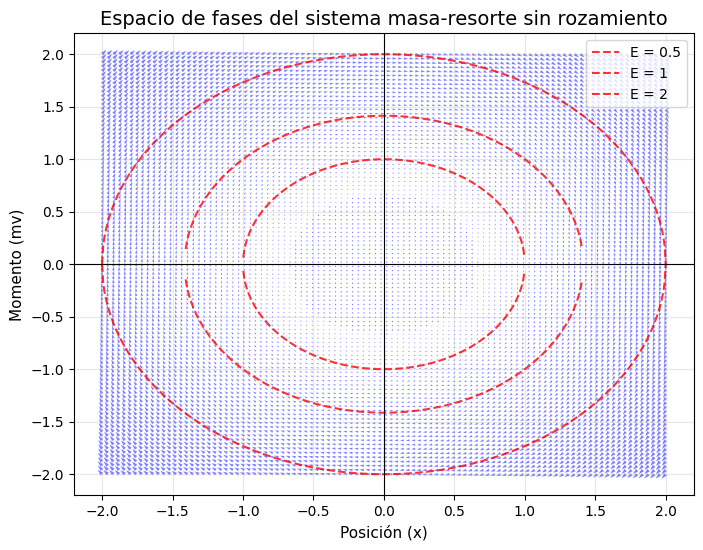

In [5]:
plt.figure(figsize=(8,6))
# Nota: Creamos el campo vectorial del espacio fasico ax.quiver(x_pos, y_pos, x_dir, y_dir, color)
plt.quiver(X,P,dxdt,dpdt, color="blue",alpha=.5)

for E in ENERGY:
    x_curve = np.linspace(-2,2,500)
    p_curve = np.sqrt(2 * m * (E - 0.5 * k * x_curve**2))
    p_curve_neg = - p_curve
    plt.plot(x_curve, p_curve, "r--", alpha=.8, label=f"E = {E}")
    plt.plot(x_curve, p_curve_neg, "r--", alpha=.8)

plt.title("Espacio de fases del sistema masa-resorte sin rozamiento", fontsize=14)
plt.xlabel("Posición (x)", fontsize=11)
plt.ylabel("Momento (mv)", fontsize=11)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.grid(alpha=.3)
plt.show()

### Evolución del sistema masa-resorte sin fricción

Este sistema está regido por la ecuación diferencial

$m\ddot{x} + kx = 0$

In [6]:
def masa_resorte(t,y):
    x, v = y
    dxdt = v
    dvdt = -(k/m)*x
    return [dxdt,dvdt]

In [7]:
x0 = 1.0
v0 = 0.0
y0 = [x0, v0]

# Tiempo de simulación
t_span = (0, 20)  # Desde t = 0 hasta t = 20 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Tiempo para evaluación

# Resolver la ecuación diferencial
sol = solve_ivp(masa_resorte, t_span, y0, t_eval=t_eval)

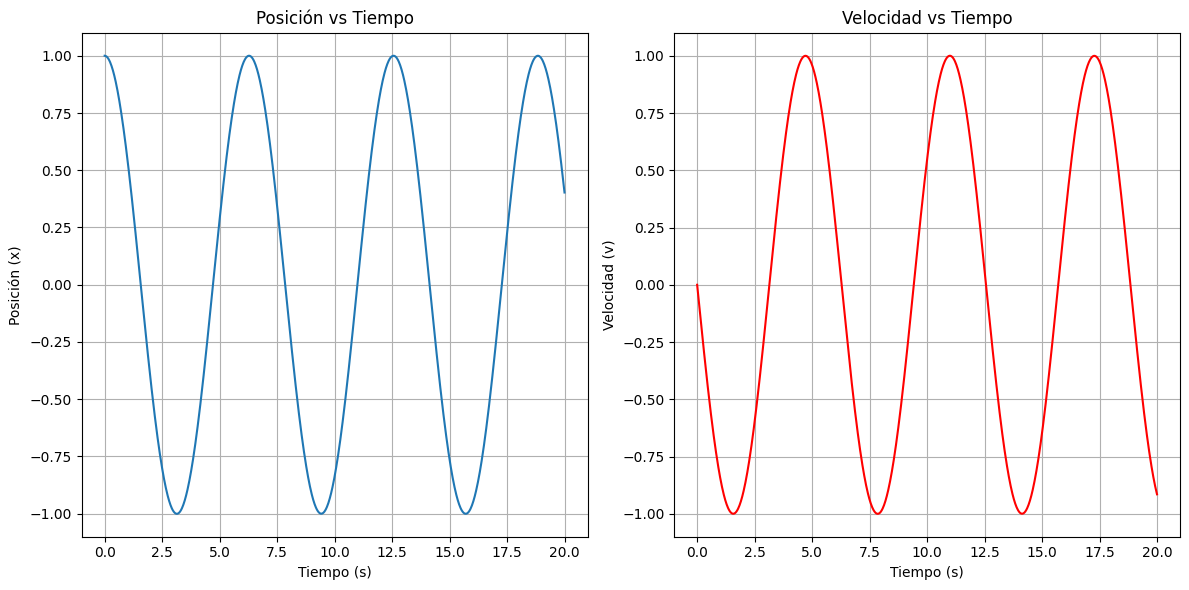

In [8]:
plt.figure(figsize=(12, 6))

# Subgráfico 1: Posición vs Tiempo
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label="Posición (x)")
plt.title("Posición vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (x)")
plt.grid(True)

# Subgráfico 2: Velocidad vs Tiempo
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label="Velocidad (v)", color='r')
plt.title("Velocidad vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (v)")
plt.grid(True)

plt.tight_layout()
plt.show()

### Espacio de fases del sistema masa-resorte



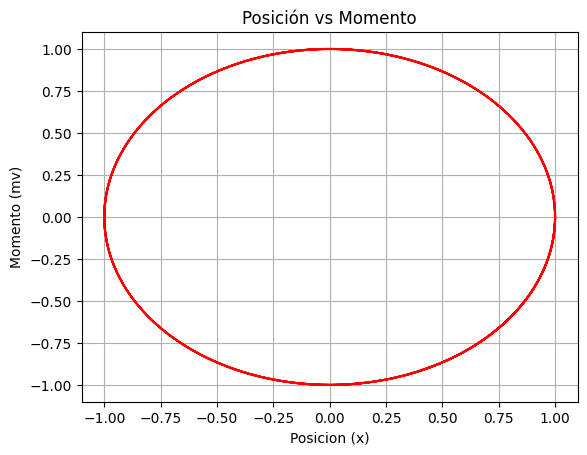

In [9]:
plt.plot(sol.y[0], m * sol.y[1], label="posicion-momento", color='r')
plt.title("Posición vs Momento")
plt.xlabel("Posicion (x)")
plt.ylabel("Momento (mv)")
plt.grid(True)
plt.show()

### Sistema con rozamiento (amortiguado)

In [11]:
# Nuevas constantes del sistema
b = 0.5 # Coeficiente de friccion
x0 = 1.0
v0 = 1.0
yo = [x0,v0]

In [12]:
def masa_resorte(t,y):
    x, v = y
    dxdt = v
    dvdt = -(k/m)*x - (b/m)*v
    return [dxdt, dvdt]

In [13]:
t_span = (0,20)
t_eval = np.linspace(t_span[0],t_span[1], 1000)

In [14]:
sol = solve_ivp(masa_resorte, t_span, y0, t_eval=t_eval)

In [1]:
plt.figure(figsize=(12, 6))

# Subgráfico 1: Posición vs Tiempo
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label="Posición (x)")
plt.title("Posición vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (x)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label="Velocidad (v)", color='r')
plt.title("Velocidad vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (v)")
plt.grid(False)

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

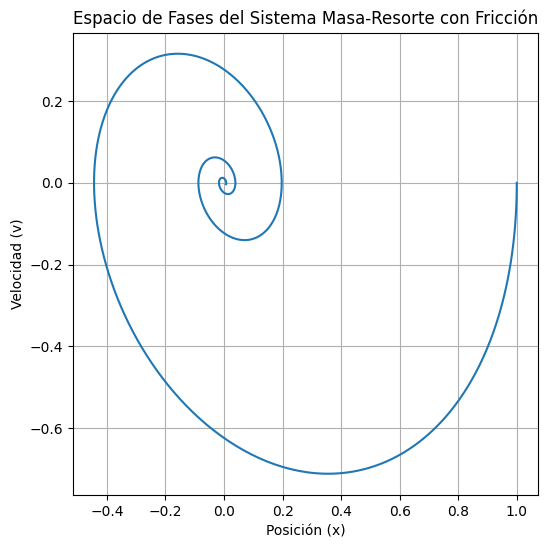

In [19]:
plt.figure(figsize=(6, 6))
plt.plot(sol.y[0], m*sol.y[1], label="Trayectoria en el espacio de fases")
plt.title("Espacio de Fases del Sistema Masa-Resorte con Fricción")
plt.xlabel("Posición (x)")
plt.ylabel("Velocidad (v)")
plt.grid(True)
plt.show()

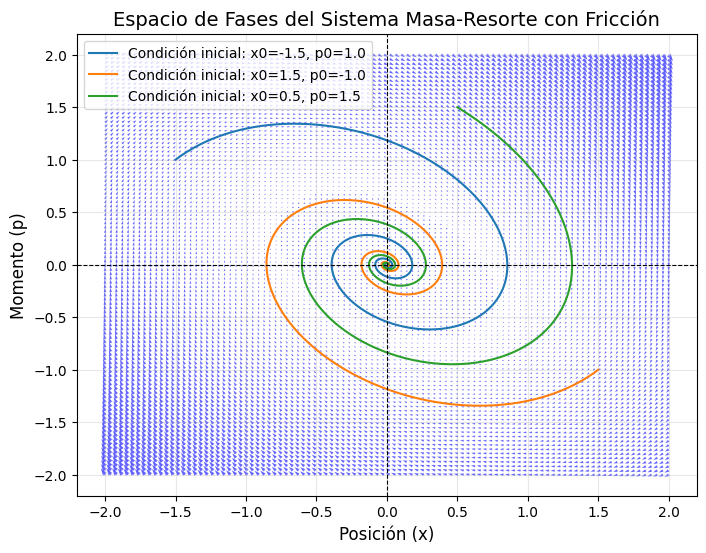

In [23]:
A = P / m  # dx/dt = p/m
B = -(k/m) * X - (b/m) * P  # dp/dt = -k/m * x - b/m * p

plt.figure(figsize=(8, 6))
plt.quiver(X, P, A, B, color="blue", alpha=0.6)

for x0, p0 in [(-1.5, 1.0), (1.5, -1.0), (0.5, 1.5)]:
    t = np.linspace(0, 20, 1000)  # Tiempo
    trajectory_x = [x0]
    trajectory_p = [p0]
    dt = t[1] - t[0]

    for _ in t[1:]:
        x_prev = trajectory_x[-1]
        p_prev = trajectory_p[-1]
        
        dx = (p_prev / m) * dt
        dp = (-(k * x_prev + b * p_prev) / m) * dt

        trajectory_x.append(x_prev + dx)
        trajectory_p.append(p_prev + dp)

    plt.plot(trajectory_x, trajectory_p, label=f"Condición inicial: x0={x0}, p0={p0}")


plt.title("Espacio de Fases del Sistema Masa-Resorte con Fricción", fontsize=14)
plt.xlabel("Posición (x)", fontsize=12)
plt.ylabel("Momento (p)", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()